# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [29]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [30]:
# 检查数据维度
data.shape

(112915, 11)

In [31]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [32]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

/var/folders/_7/wlwq7pgj1815rs42br1b3pv80000gn/T/ipykernel_26755/2980780030.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


In [33]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [34]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
positive_negative_distribution = y_train.value_counts()
print("Distribution of Positive (1) and Negative (0) samples in 'SeriousDlqin2yrs' field:")
print(positive_negative_distribution)


Distribution of Positive (1) and Negative (0) samples in 'SeriousDlqin2yrs' field:
SeriousDlqin2yrs
0    81076
1     5842
Name: count, dtype: int64


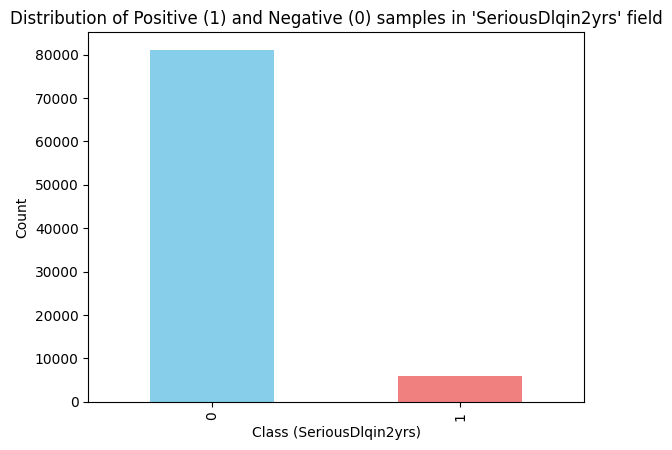

In [36]:
# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
import matplotlib.pyplot as plt

positive_negative_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])

plt.xlabel('Class (SeriousDlqin2yrs)')
plt.ylabel('Count')
plt.title('Distribution of Positive (1) and Negative (0) samples in \'SeriousDlqin2yrs\' field')

plt.show()

#### 2.数据预处理之离散化

In [37]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
# 计算出分桶边界
age_bins = range(int(data['age'].min()), int(data['age'].max()) + 4, 3)

# 基于pandas的cut函数进行离散化(分箱、分桶)
data['age_group'] = pd.cut(data['age'], bins=age_bins, right=False, labels=False)

print(data[['age', 'age_group']])


         age  age_group
0       45.0         15
1       40.0         13
2       38.0         12
3       30.0         10
4       49.0         16
...      ...        ...
112910  50.0         16
112911  74.0         24
112912  44.0         14
112913  30.0         10
112914  64.0         21

[108648 rows x 2 columns]


#### 3.数据预处理之独热向量编码

In [38]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
# 使用 pandas get_dummies 对“age_group”列执行独热向量编码
one_hot_encoded_age = pd.get_dummies(data['age_group'], prefix='age_group')

# Concatenate the one-hot encoded columns to the original DataFrame
data = pd.concat([data, one_hot_encoded_age], axis=1)

# Display the resulting DataFrame with one-hot encoded columns
print(data)


        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines   age  \
0                      1                              0.766127  45.0   
1                      0                              0.957151  40.0   
2                      0                              0.658180  38.0   
3                      0                              0.233810  30.0   
4                      0                              0.907239  49.0   
...                  ...                                   ...   ...   
112910                 0                              0.385742  50.0   
112911                 0                              0.040674  74.0   
112912                 0                              0.299745  44.0   
112913                 0                              0.000000  30.0   
112914                 0                              0.850283  64.0   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                        2.0   0.802982      

#### 4.数据预处理之幅度缩放

In [39]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
# 初始化StandardScaler
scaler = StandardScaler()

# 选择要缩放的连续特征（“年龄”）
features_to_scale = ['age']

# 缩放选定的特征
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

print(data)


        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines       age  \
0                      1                              0.766127 -0.440122   
1                      0                              0.957151 -0.786059   
2                      0                              0.658180 -0.924434   
3                      0                              0.233810 -1.477933   
4                      0                              0.907239 -0.163372   
...                  ...                                   ...       ...   
112910                 0                              0.385742 -0.094185   
112911                 0                              0.040674  1.566312   
112912                 0                              0.299745 -0.509309   
112913                 0                              0.000000 -1.477933   
112914                 0                              0.850283  0.874438   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0            

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [40]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression

# 初始化 Logistic Regression 模型
model = LogisticRegression(max_iter=1000)

# 拟合模型
model.fit(X_train, y_train)

# 获取特征的系数
coefficients = model.coef_

# 显示特征的系数
print("Coefficients:", coefficients)


Coefficients: [[-7.15712635e-05 -3.98723155e-02  4.88658686e-01  2.13066558e-01
  -3.21127288e-05 -1.57887927e-02  5.22975927e-01 -2.53818439e-02
  -9.79534274e-01  7.06453725e-02]]


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [41]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参

from sklearn.model_selection import GridSearchCV

# 准备参数网格
# param_grid = {'penalty': ['l1', 'l2'], 'C': [1, 10, 100, 500]}
param_grid = {'penalty': ['l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# 初始化 Logistic Regression 模型
model = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

# 初始化 GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# 拟合模型
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1']},
             scoring='accuracy')

In [42]:
# 输出最好的超参数
print("Best Hyperparameters:", grid_search.best_params_)

# 输出最好的模型
best_model = grid_search.best_estimator_
print("Best Model:", best_model)


Best Hyperparameters: {'C': 1, 'penalty': 'l1'}
Best Model: LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='liblinear')


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [43]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score

# 在测试集上进行预测
y_pred = best_model.predict(X_test)

# 计算各种测试指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)  # Note: roc_auc_score is suitable for binary classification
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 打印测试指标结果
print("Accuracy:", accuracy)
print("Recall:", recall)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("F1 Score:", f1)


Accuracy: 0.9326737229636447
Recall: 0.03369272237196765
ROC AUC: 0.5161301703334698
Confusion Matrix:
 [[20217    29]
 [ 1434    50]]
F1 Score: 0.06397952655150352


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [44]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score

# 设定不同的阈值
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # 根据阈值进行预测
    y_pred_thresholded = (best_model.predict_proba(X_test)[:, 1] > threshold).astype(int)
    
    # 计算各种测试指标
    accuracy = accuracy_score(y_test, y_pred_thresholded)
    recall = recall_score(y_test, y_pred_thresholded)
    roc_auc = roc_auc_score(y_test, y_pred_thresholded)
    conf_matrix = confusion_matrix(y_test, y_pred_thresholded)
    f1 = f1_score(y_test, y_pred_thresholded)

    # 打印测试指标结果
    print(f"\nThreshold: {threshold}")
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("ROC AUC:", roc_auc)
    print("Confusion Matrix:\n", conf_matrix)
    print("F1 Score:", f1)


Threshold: 0.1
Accuracy: 0.8450069028992176
Recall: 0.4366576819407008
ROC AUC: 0.6557979706749835
Confusion Matrix:
 [[17714  2532]
 [  836   648]]
F1 Score: 0.27787307032590053

Threshold: 0.2
Accuracy: 0.92899217671422
Recall: 0.16037735849056603
ROC AUC: 0.5728538970660871
Confusion Matrix:
 [[19949   297]
 [ 1246   238]]
F1 Score: 0.2357602773650322

Threshold: 0.3
Accuracy: 0.9336401288541187
Recall: 0.08827493261455525
ROC AUC: 0.5419395012771483
Confusion Matrix:
 [[20157    89]
 [ 1353   131]]
F1 Score: 0.15375586854460097

Threshold: 0.4
Accuracy: 0.9331799355729407
Recall: 0.05390835579514825
ROC AUC: 0.5257687585554819
Confusion Matrix:
 [[20198    48]
 [ 1404    80]]
F1 Score: 0.09925558312655088

Threshold: 0.5
Accuracy: 0.9326737229636447
Recall: 0.03369272237196765
ROC AUC: 0.5161301703334698
Confusion Matrix:
 [[20217    29]
 [ 1434    50]]
F1 Score: 0.06397952655150352

Threshold: 0.6
Accuracy: 0.932121491026231
Recall: 0.020889487870619946
ROC AUC: 0.509901426736850

#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [45]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel
# 获取逻辑回归模型的系数
coefficients = best_model.coef_[0]

# 计算系数的绝对值
abs_coefficients = abs(coefficients)

# 获取特征的排序索引
feature_indices = abs_coefficients.argsort()[::-1]

# 打印特征排序结果
print("Feature Ranking (Logistic Regression Coefficients):")
for index in feature_indices:
    print(f"Feature {index}: {X_train.columns[index]} - Coefficient: {coefficients[index]}")

# 选择前N个特征进行建模（例如选择前10个特征）
selected_features = X_train.columns[feature_indices[:10]]

# 使用选择的特征重新建模
model_with_selected_features = LogisticRegression(max_iter=1000)
model_with_selected_features.fit(X_train[selected_features], y_train)

# 在测试集上进行预测并计算评估指标
y_pred_selected_features = model_with_selected_features.predict(X_test[selected_features])

# 打印评估指标
print("\nModel with Selected Features:")
print("Accuracy:", accuracy_score(y_test, y_pred_selected_features))
print("Recall:", recall_score(y_test, y_pred_selected_features))
print("ROC AUC:", roc_auc_score(y_test, y_pred_selected_features))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_selected_features))
print("F1 Score:", f1_score(y_test, y_pred_selected_features))



Feature Ranking (Logistic Regression Coefficients):
Feature 3: DebtRatio - Coefficient: 1.3726551648593193
Feature 8: NumberOfTime60-89DaysPastDueNotWorse - Coefficient: -0.7365431571600579
Feature 2: NumberOfTime30-59DaysPastDueNotWorse - Coefficient: 0.4396254331029591
Feature 6: NumberOfTimes90DaysLate - Coefficient: 0.3356487093133889
Feature 7: NumberRealEstateLoansOrLines - Coefficient: -0.1934723995518849
Feature 9: NumberOfDependents - Coefficient: 0.10205562403196596
Feature 1: age - Coefficient: -0.025696485583276425
Feature 5: NumberOfOpenCreditLinesAndLoans - Coefficient: -0.023420201467595957
Feature 0: RevolvingUtilizationOfUnsecuredLines - Coefficient: -7.930562638330583e-05
Feature 4: MonthlyIncome - Coefficient: -4.915034697960919e-06



Model with Selected Features:
Accuracy: 0.9334560515416475
Recall: 0.05660377358490566
ROC AUC: 0.5271658599229477
Confusion Matrix:
 [[20200    46]
 [ 1400    84]]
F1 Score: 0.10408921933085502


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

# 初始化决策树模型
tree_model = DecisionTreeClassifier()

# 使用训练集拟合模型
tree_model.fit(X_train, y_train)

# 获取特征重要度
importances = tree_model.feature_importances_

# 获取特征的排序索引
tree_feature_indices = importances.argsort()[::-1]

# 打印特征排序结果
print("Feature Ranking (Decision Tree Feature Importances):")
for index in tree_feature_indices:
    print(f"Feature {index}: {X_train.columns[index]} - Importance: {importances[index]}")

# 使用SelectFromModel进行特征选择
sfm = SelectFromModel(tree_model, threshold='median')
sfm.fit(X_train, y_train)

# 获取选择的特征索引
selected_feature_indices = sfm.get_support(indices=True)

# 获取选择的特征
selected_features_tree = X_train.columns[selected_feature_indices]

# 使用选择的特征重新建模
model_with_selected_features_tree = LogisticRegression(max_iter=1000)
model_with_selected_features_tree.fit(X_train[selected_features_tree], y_train)

# 在测试集上进行预测并计算评估指标
y_pred_selected_features_tree = model_with_selected_features_tree.predict(X_test[selected_features_tree])

# 打印评估指标
print("\nModel with Selected Features (Tree-based Feature Selection):")
print("Accuracy:", accuracy_score(y_test, y_pred_selected_features_tree))
print("Recall:", recall_score(y_test, y_pred_selected_features_tree))
print("ROC AUC:", roc_auc_score(y_test, y_pred_selected_features_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_selected_features_tree))
print("F1 Score:", f1_score(y_test, y_pred_selected_features_tree))


Feature Ranking (Decision Tree Feature Importances):
Feature 3: DebtRatio - Importance: 0.19147991205451909
Feature 0: RevolvingUtilizationOfUnsecuredLines - Importance: 0.1879775492272258
Feature 4: MonthlyIncome - Importance: 0.17492147770292596
Feature 6: NumberOfTimes90DaysLate - Importance: 0.12084902795202111
Feature 1: age - Importance: 0.11736930114941771
Feature 5: NumberOfOpenCreditLinesAndLoans - Importance: 0.07983851442290726
Feature 9: NumberOfDependents - Importance: 0.04374009733881148
Feature 2: NumberOfTime30-59DaysPastDueNotWorse - Importance: 0.03559751681404709
Feature 7: NumberRealEstateLoansOrLines - Importance: 0.025259209149866332
Feature 8: NumberOfTime60-89DaysPastDueNotWorse - Importance: 0.02296739418825833

Model with Selected Features (Tree-based Feature Selection):
Accuracy: 0.9319834330418776
Recall: 0.012129380053908356
ROC AUC: 0.505768335191431
Confusion Matrix:
 [[20234    12]
 [ 1466    18]]
F1 Score: 0.023778071334214


#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Define a reduced hyperparameter search space
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Use GridSearchCV for hyperparameter tuning with reduced candidates
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Output the best hyperparameters
print("Best Hyperparameters for RandomForestClassifier:", grid_search_rf.best_params_)

# Output the best model
best_rf_model = grid_search_rf.best_estimator_

# Predict on the test set and calculate evaluation metrics
y_pred_rf = best_rf_model.predict(X_test)

# Print evaluation metrics
print("\nRandomForestClassifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Best Hyperparameters for RandomForestClassifier: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

RandomForestClassifier Evaluation:
Accuracy: 0.935250805338242
Recall: 0.15026954177897575
ROC AUC: 0.5715291203906239
Confusion Matrix:
 [[20100   146]
 [ 1261   223]]
F1 Score: 0.24069077172153266


In [ ]:
from sklearn.svm import SVC

# Initialize Support Vector Machine model
svm_model = SVC(random_state=42)

# Define a reduced hyperparameter search space
param_grid = {
    'C': [1],
    'kernel': ['linear'],
    'gamma': ['scale'],
}

# Use GridSearchCV for hyperparameter tuning with reduced candidates
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Output the best hyperparameters
print("Best Hyperparameters for SVM:", grid_search_svm.best_params_)

# Output the best model
best_svm_model = grid_search_svm.best_estimator_

# Predict on the test set and calculate evaluation metrics
y_pred_svm = best_svm_model.predict(X_test)

# Print evaluation metrics
print("\nSVM Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier()

# Define a reduced hyperparameter search space
param_grid = {
    'n_neighbors': [5],
    'weights': ['uniform'],
    'p': [1],
}

# Use GridSearchCV for hyperparameter tuning with reduced candidates
grid_search_knn = GridSearchCV(knn_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Output the best hyperparameters
print("Best Hyperparameters for KNN:", grid_search_knn.best_params_)

# Output the best model
best_knn_model = grid_search_knn.best_estimator_

# Predict on the test set and calculate evaluation metrics
y_pred_knn = best_knn_model.predict(X_test)

# Print evaluation metrics
print("\nKNN Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))